### **<center><font style="color:rgb(100,109,254)">Linear Regression on Boston Dataset</font> </center>**

### 01. Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

c:\Users\as\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


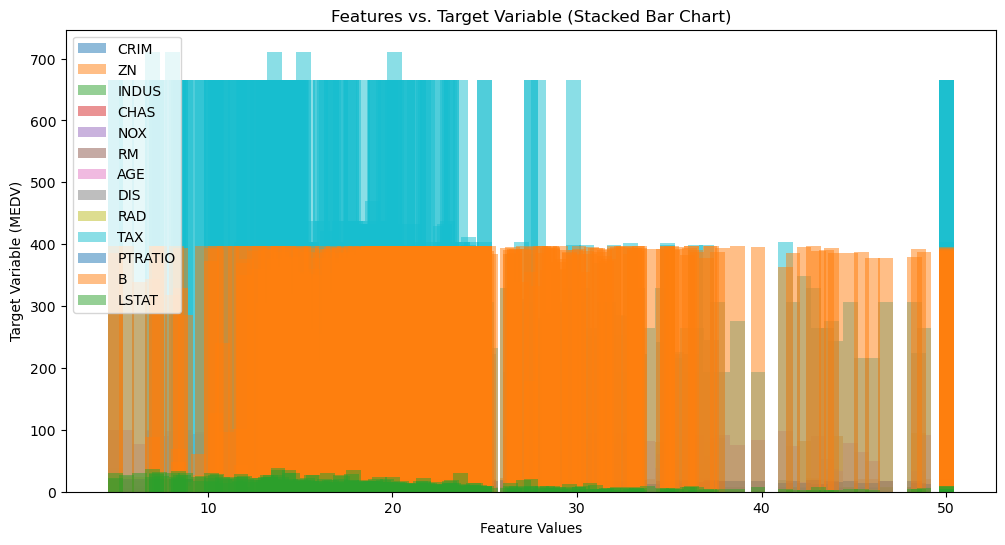

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the Boston dataset from a CSV file
data = pd.read_csv(r"C:\Users\as\Downloads\ai lab\lab4\HousingData.csv")

# Extract features and target variable
X = data.drop("MEDV", axis=1)  # Features (excluding the target variable)
y = data["MEDV"]  # Target variable (median home values)

# Get the feature names (column names)
feature_names = X.columns

# Create a single bar chart with all features
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate through each feature and plot it as a stacked bar
for feature in feature_names:
    ax.bar(y, X[feature], label=feature, alpha=0.5)

ax.set_xlabel("Feature Values")
ax.set_ylabel("Target Variable (MEDV)")
ax.set_title("Features vs. Target Variable (Stacked Bar Chart)")
ax.legend()
plt.show()



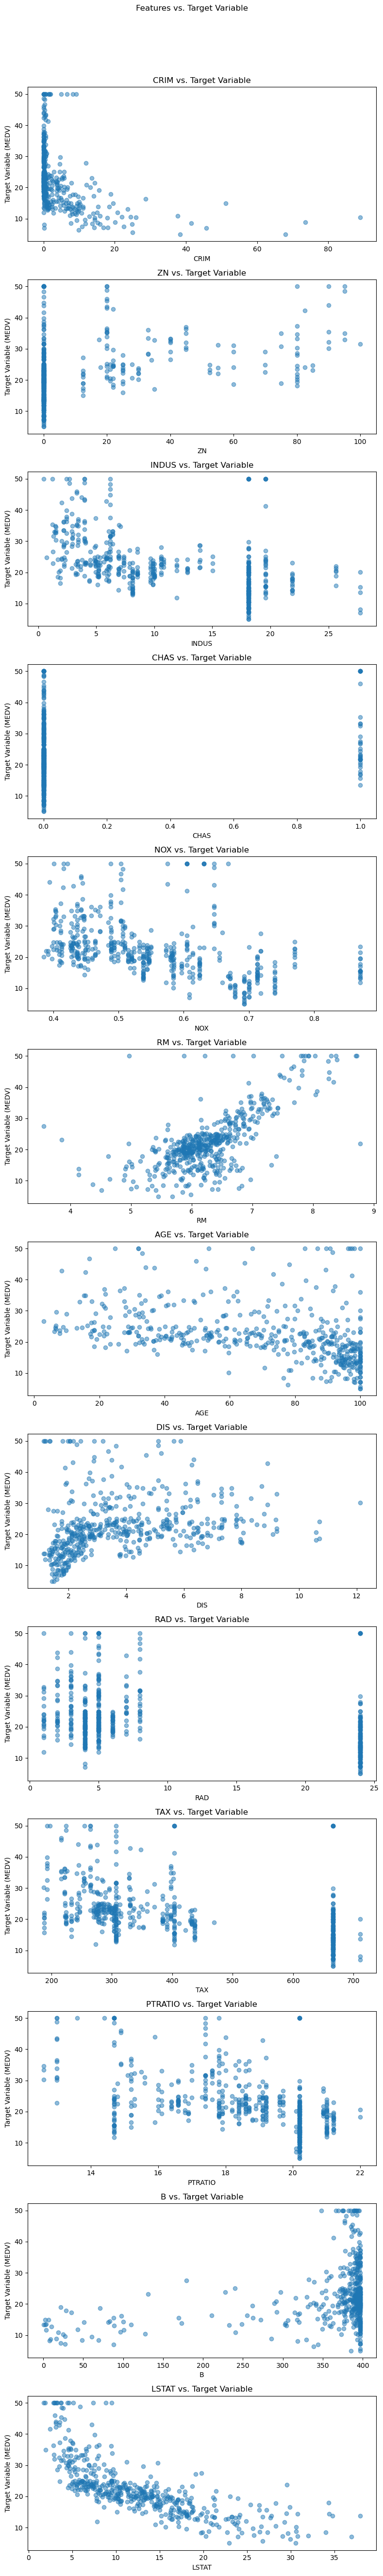

In [13]:
import matplotlib.pyplot as plt

# Create subplots for each feature
n_features = X.shape[1]

fig, axes = plt.subplots(n_features, 1, figsize=(8, 4 * n_features))
fig.suptitle("Features vs. Target Variable", y=1.02)

for i in range(n_features):
    axes[i].scatter(X.iloc[:, i], y, alpha=0.5)
    axes[i].set_ylabel("Target Variable (MEDV)")
    axes[i].set_xlabel(feature_names[i])
    axes[i].set_title(f"{feature_names[i]} vs. Target Variable")

plt.tight_layout()
plt.show()


### 03. Transform the Data into dataframe

* `data:` Independent variables also known as x values
* `feature_names:` the column names of the data
* `target:` dependent variable or y values 

In [9]:
import pandas as pd

# Load the Boston dataset from a CSV file
data = pd.read_csv(r"C:\Users\as\Downloads\ai lab\lab4\HousingData.csv")

# Extract features (X) and target variable (y)
X = data.drop("MEDV", axis=1)  # Features (excluding the target variable)
y = data[["MEDV"]]  # Target variable (as a DataFrame with one column)

# Get the feature names (column names)
feature_names = X.columns


### 04. Get some Statistics from dataset

In [11]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### 05. Split the Dataset into Training and Testing 

In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=42)


### 06. Initialize the Linear Regression Model

In [15]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()


### 07. Train the Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Create a Linear Regression model
model = LinearRegression()

# Handle missing values in your training data (if any)
imputer = SimpleImputer(strategy="mean")  # You can choose other strategies as well
xTrain = imputer.fit_transform(xTrain)

# Fit the Linear Regression model to the training data
model.fit(xTrain, yTrain)



LinearRegression()

### 08. Print the coefficient and intercept

In [20]:
model.coef_

array([[-1.25456995e-01,  3.38833674e-02, -3.70686867e-03,
         3.81356767e+00, -1.47483345e+01,  4.26320546e+00,
        -2.85317206e-02, -1.47650715e+00,  1.87919790e-01,
        -6.72462313e-03, -9.02654290e-01,  1.17043560e-02,
        -4.71301093e-01]])

In [21]:
model.intercept_

array([30.67801687])

### 09. Make the Predictions 

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Create a Linear Regression model
model = LinearRegression()

# Handle missing values in the training and test data
imputer = SimpleImputer(strategy="mean")  # Use the same strategy as for the training data

# Fit the imputer on the training data and transform both training and test data
xTrain = imputer.fit_transform(xTrain)
xTest = imputer.transform(xTest)

# Fit the Linear Regression model to the training data
model.fit(xTrain, yTrain)

# Make predictions on the test data
yPred = model.predict(xTest)




c:\Users\as\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [26]:
yTest # actual values

,MEDV
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
110,21.7
321,23.1
265,22.8
29,21.0


### 10. Accuracy Check

In [27]:
model.score(xTrain, yTrain)

0.7276897671891934

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(yPred, yTest)

21.040114833804942